In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data[["sepal_length","sepal_width","petal_length","petal_width"]]


# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

D2 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

In [10]:
from sklearn.manifold import TSNE

# Применение t-SNE для снижения размерности до 2
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

D3 = pd.DataFrame(X_tsne, columns=["t-SNE1", "t-SNE2"])

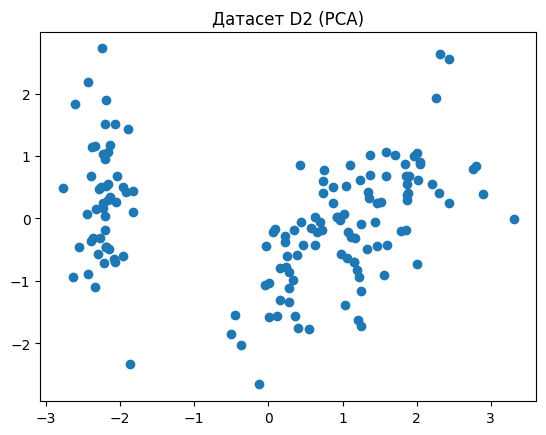

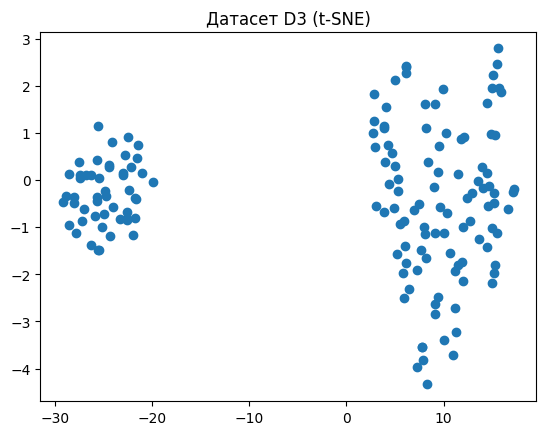

In [11]:
import matplotlib.pyplot as plt

# Визуализация D2
plt.scatter(D2["PC1"], D2["PC2"])
plt.title("Датасет D2 (PCA)")
plt.show()

# Визуализация D3
plt.scatter(D3["t-SNE1"], D3["t-SNE2"])
plt.title("Датасет D3 (t-SNE)")
plt.show()

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings('ignore')

n_clusters = 3
results = []

# Кластеризация датасетов и вычисление silhouette score
for dataset_name, dataset in [("X_scaled", X_scaled), ("X_pca", X_pca), ("X_tsne", X_tsne)]:
    for model_name, model in [("KMeans", KMeans(n_clusters=n_clusters)), 
                              ("AgglomerativeClustering", AgglomerativeClustering(n_clusters=n_clusters)),
                              ("GaussianMixture", GaussianMixture(n_components=n_clusters))]:
        model.fit(dataset)
        
        if model_name == "GaussianMixture":
            labels = model.predict_proba(dataset).argmax(axis=1)
        else:
            labels = model.labels_
        
        silhouette = silhouette_score(dataset, labels)
        results.append({"Dataset": dataset_name, "Model": model_name, "Silhouette Score": silhouette})

df_results = pd.DataFrame(results)
df_results

,Dataset,Model,Silhouette Score
0,X_scaled,KMeans,0.458972
1,X_scaled,AgglomerativeClustering,0.445540
2,X_scaled,GaussianMixture,0.372773
3,X_pca,KMeans,0.510446
4,X_pca,AgglomerativeClustering,0.510294
5,X_pca,GaussianMixture,0.492725
6,X_tsne,KMeans,0.646635
7,X_tsne,AgglomerativeClustering,0.618034
8,X_tsne,GaussianMixture,0.644810
